<a href="https://colab.research.google.com/github/silvia-jesus/CAR_Labrea/blob/main/CAR_RL_Labrea_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs')

from pathlib import Path
Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
import io
import requests

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


pd.options.display.float_format = '{:.2f}'.format

In [ ]:
imoveis = gpd.read_file('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/AREA_IMOVEL/AREA_IMOVEL_UNZIPPED/IM_1302405_102033.shp')

In [ ]:
imoveis.head()

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,geometry
0,AM-1302405-6F63EBF5EA864058B2B02CE6CE7C978F,59.32,AM,LÃ¡brea,0.59,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-734906.403 2562229.825, -734869.871..."
1,AM-1302405-AA1907779A0F41A9A6B2223027F7A829,100.22,AM,LÃ¡brea,1.00,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-736595.743 2557908.955, -736330.354..."
2,AM-1302405-D7B80B40290D4971BE914DC9A193EAD5,4924.32,AM,LÃ¡brea,51.31,IRU,AT,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-710176.765 2573995.713, -709583.330..."
3,AM-1302405-450B753B24744318B6EA3DDC40A32C5D,4175.21,AM,LÃ¡brea,41.75,IRU,PE,"Analisado com pendÃªncias, aguardando retifica...","POLYGON ((-720061.679 2577243.663, -710778.119..."
4,AM-1302405-6AA5D37ECEC74951A4167DFA842906A3,538.79,AM,LÃ¡brea,5.39,IRU,AT,Aguardando anÃ¡lise,"POLYGON ((-724607.248 2561645.336, -724373.290..."


In [ ]:
imoveis['area_calc_IM_ha'] = imoveis['geometry'].area*0.0001

In [ ]:
crs = imoveis.crs
crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid
- Ellipsoid: Australian_Natl_S_Amer_1969
- Prime Meridian: Greenwich

In [ ]:
cd_mun = '1302405'

In [ ]:
url = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip'
response = requests.get(url)
content = response.content

muni_br = gpd.read_file(io.BytesIO(content), sep=',', compression='gzip', index_col=0, quotechar='"')

In [ ]:
muni = muni_br[muni_br['CD_MUN']==cd_mun]
muni = muni.to_crs(crs)
muni

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
108,1302405,Lábrea,AM,68262.68,"POLYGON ((-555625.691 2864929.710, -554633.619..."


In [ ]:
cnuc = gpd.read_file('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/CNUC_2022_07/cnuc_2022_07_pol.shp')
cnuc = cnuc.to_crs(crs)
cnuc['area_calc_uc_ha']=cnuc['geometry'].area/ 10**4
cnuc.head()

,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,geometry,area_calc_uc_ha
0,1.00,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,555576155,Reserva Particular do Patrimônio Natural,US,estadual,2010,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,6.52,RPPN BUGIO E COMPANHIA,"POLYGON ((1889816.388 1272529.081, 1889838.349...",6.52
1,2.00,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,555682066,Área de Proteção Ambiental,US,municipal,2018,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,800.37,APA DA BACIA DO CORREGO CAPAO GRANDE,"POLYGON ((1186433.318 1579635.882, 1186358.676...",800.38
2,3.00,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,555636623,Reserva Particular do Patrimônio Natural,US,estadual,2013,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,250.49,RPPN PILAR,"MULTIPOLYGON (((1672132.143 969869.070, 167216...",250.49
3,4.00,1754,FLORESTA ESTADUAL DO ARAGUAIA,351978,Floresta,US,estadual,2002,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,22337.95,FE DO ARAGUAIA,"MULTIPOLYGON (((986349.113 2151478.767, 987057...",22337.80
4,5.00,2092,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL DA CA...,555599946,Reserva Particular do Patrimônio Natural,US,federal,2007,Correto (O poligono corresponde ao memorial de...,Portaria nº 25 de 11/12/2007,0000.00.2092,Instituto Chico Mendes de Conservação da Biodi...,167.35,RPPN DA CABECEIRA DO CAFÔFO,"POLYGON ((1757516.813 1048280.087, 1757146.501...",167.35


In [ ]:
print(muni.crs)
print(cnuc.crs)
print(imoveis.crs)

PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid",SPHEROID["Australian_Natl_S_Amer_1969",6378160,298.25]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-32],PARAMETER["longitude_of_center",-60],PARAMETER["standard_parallel_1",-5],PARAMETER["standard_parallel_2",-42],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unknown_based_on_Australian_Natl_S_Amer_1969_ellipsoid",SPHEROID["Australian_Natl_S_Amer_1969",6378160,298.25]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-32],PARAMETER["longitude_of_center",-60],PARAMETER["standard_parallel_1",-5],PARAMETER["standard_parallel_2",-42],PARAMETER["false_easting",0],PARAMETER["false_northing"

<Axes: >

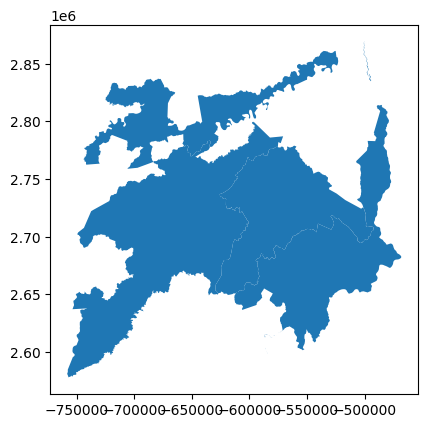

In [ ]:
uc_muni = cnuc.overlay(muni, how='intersection')
uc_muni.plot()

In [ ]:
uc_muni

,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,area_calc_uc_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,"POLYGON ((-535551.038 2861102.212, -535470.865..."
1,351.00,1628,RESERVA EXTRATIVISTA ITUXí,478421,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1628,Instituto Chico Mendes de Conservação da Biodi...,776323.49,RESEX ITUXÍ,776329.64,1302405,Lábrea,AM,68262.68,"POLYGON ((-564486.525 2777370.842, -564399.767..."
2,450.00,85,FLORESTA NACIONAL DE BALATA-TUFARI,351820,Floresta,US,federal,2005,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 18/02/2005,0000.00.0085,Instituto Chico Mendes de Conservação da Biodi...,1080020.94,FN DE BALATA-TUFARI,1079681.07,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-495173.420 2835160.910, -4950..."
3,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-507706.828 2654279.276, -5078..."
4,1445.00,768,ESTAÇÃO ECOLÓGICA SERRA DOS TRÊS IRMÃOS,33609,Estação Ecológica,PI,estadual,1990,Aproximado (O poligono representa uma estimati...,Decreto nº 4584 de 28/03/1990,0000.11.0768,Secretaria de Estado do Desenvolvimento Ambien...,88959.12,EE SERRA DOS TRÊS IRMÃOS,88961.77,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-496506.781 2651956.397, -4968..."
5,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-572838.734 2781081.325, -5749..."
6,1737.00,1733,RESERVA EXTRATIVISTA CANUTAMA,555576283,Reserva Extrativista,US,estadual,2009,Correto (O poligono corresponde ao memorial de...,Decreto nº 28.421 de 30/03/2009,0000.13.1733,Secretaria de Estado do Meio Ambiente do Amazonas,197948.70,RESEX CANUTAMA,197988.18,1302405,Lábrea,AM,68262.68,"POLYGON ((-548100.893 2867980.517, -548093.115..."


In [ ]:
imoveis_ucs = imoveis.overlay(uc_muni, how='intersection')

<Axes: >

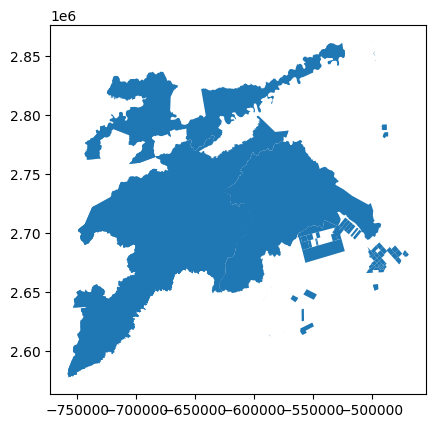

In [ ]:
imoveis_ucs.plot()

In [ ]:
imoveis_ucs['area_intersec_ha']=imoveis_ucs['geometry'].area *0.0001
imoveis_ucs['perc_intersec_imovel']=imoveis_ucs['area_intersec_ha']/imoveis_ucs['area_calc_IM_ha']*100

In [ ]:
sort_imoveis = imoveis_ucs.sort_values(by='perc_intersec_imovel', ascending=False)
sort_imoveis

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,area_calc_uc_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel
198,AM-1302405-195EC45CF6754C62A317F7A00427F17B,53.11,AM,LÃ¡brea,0.53,IRU,AT,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",53.07,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-726775.370 2710166.983, -730042.067...",53.07,100.00
271,AM-1302405-C3104A76787841A8B69A86865E96194A,962.34,AM,LÃ¡brea,9.62,IRU,AT,Em anÃ¡lise,962.41,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,1302405,Lábrea,AM,68262.68,"POLYGON ((-498050.704 2672599.763, -502592.058...",962.41,100.00
193,AM-1302405-7738CEC6219C41E7B5CBF268FEC66AAC,490.26,AM,LÃ¡brea,4.90,IRU,AT,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",489.82,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-715825.073 2710570.386, -715780.670...",489.82,100.00
272,AM-1302405-4CA5902F1F0845FE866654260BA66F4A,1044.52,AM,LÃ¡brea,10.45,IRU,AT,Em anÃ¡lise,1044.56,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,1302405,Lábrea,AM,68262.68,"POLYGON ((-495931.757 2674607.817, -498050.704...",1044.56,100.00
177,AM-1302405-9C9095EDD4BB49E28366081019AE0F92,2701.08,AM,LÃ¡brea,27.01,IRU,AT,Em anÃ¡lise,2699.08,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-721880.005 2712322.602, -735634.409...",2699.08,100.00
253,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,973.24,AM,LÃ¡brea,9.73,IRU,AT,Em anÃ¡lise,973.31,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,1302405,Lábrea,AM,68262.68,"POLYGON ((-491897.448 2679059.441, -491563.879...",973.31,100.00
270,AM-1302405-164946544BDB46A8A3DC6C32F6C745EF,1148.89,AM,LÃ¡brea,11.49,IRU,AT,Em anÃ¡lise,1148.92,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,1302405,Lábrea,AM,68262.68,"POLYGON ((-499372.475 2668768.370, -499345.107...",1148.92,100.00
127,AM-1302405-7557D388EC2147FABC92592BCDCA935E,572.01,AM,LÃ¡brea,5.72,IRU,AT,Em anÃ¡lise,571.30,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-623794.840 2704299.255, -623757.771...",571.30,100.00
269,AM-1302405-9AEAF1C9ED4A41298AAEE33CE32BDEAF,1000.71,AM,LÃ¡brea,10.01,IRU,AT,Em anÃ¡

In [ ]:
imoveis_ucs['perc_intersec_uc']=imoveis_ucs['area_intersec_ha']/imoveis_ucs['area_calc_uc_ha']*100

In [ ]:
sort_ucs = imoveis_ucs.sort_values(by='perc_intersec_uc', ascending=False)
sort_ucs

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,area_calc_uc_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel,perc_intersec_uc
222,AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5,776942.29,AM,LÃ¡brea,7769.42,PCT,AT,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",776329.64,351.00,1628,RESERVA EXTRATIVISTA ITUXí,478421,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1628,Instituto Chico Mendes de Conservação da Biodi...,776323.49,RESEX ITUXÍ,776329.64,1302405,Lábrea,AM,68262.68,"POLYGON ((-564486.525 2777370.842, -564399.767...",776329.64,100.00,100.00
65,AM-1302405-8C68014707E543FA8B54A7C8488CEB56,1474872.06,AM,LÃ¡brea,14748.72,PCT,SU,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",1472609.77,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-572838.734 2781081.325, -5745...",1472609.77,100.00,100.00
10,AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F,605364.44,AM,LÃ¡brea,6053.64,PCT,SU,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",604235.97,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,"POLYGON ((-535387.351 2861098.660, -535353.947...",550277.23,91.07,91.07
206,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,948877.65,AM,LÃ¡brea,9488.71,IRU,PE,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",947842.68,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-691139.322 2687095.493, -6913...",527885.47,55.69,35.85
125,AM-1302405-661BF1B5B8104DA18E3B18A280639C09,118028.63,AM,LÃ¡brea,1180.29,IRU,AT,Em anÃ¡lise,117947.42,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-676940.403 2673571.015, -677039.291...",117139.98,99.32,7.95
34,AM-1302405-96D37CEB2E0641B79D3DCDC1E8995117,148704.09,AM,LÃ¡brea,1487.04,IRU,AT,Em anÃ¡lise,148478.16,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-619778.267 2725072.138, -619662.408...",114421.13,77.06,7.77
205,AM-1302405-371EA636D29B496F98A125C02365005D,133105.99,AM,LÃ¡brea,1331.06,IRU,SU,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",132894.45,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"POLYGON ((-630489.930 2672598.285, -634668.749...",84241.09,63.39,5.72
173,AM-1302405-34923DEA58F240239834C5DB8F784CAC,133105.99,AM,LÃ¡brea,1331.06,IRU,AT,Aguardando analise,132894.45,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decre

**Quantificação da sobreposição entre UCS e imóveis como um todo**

In [ ]:
imoveis_filt = imoveis_ucs[imoveis_ucs['perc_intersec_uc']<90]

In [ ]:
filt = imoveis_ucs[imoveis_ucs['perc_intersec_uc']>90]
filt

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,area_calc_uc_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_intersec_ha,perc_intersec_imovel,perc_intersec_uc
10,AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F,605364.44,AM,LÃ¡brea,6053.64,PCT,SU,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",604235.97,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,"POLYGON ((-535387.351 2861098.660, -535353.947...",550277.23,91.07,91.07
65,AM-1302405-8C68014707E543FA8B54A7C8488CEB56,1474872.06,AM,LÃ¡brea,14748.72,PCT,SU,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",1472609.77,1616.00,1612,FLORESTA NACIONAL DO IQUIRI,478418,Floresta,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº SN de 09/05/2008,0000.00.1612,Instituto Chico Mendes de Conservação da Biodi...,1472601.95,FN DO IQUIRI,1472609.85,1302405,Lábrea,AM,68262.68,"MULTIPOLYGON (((-572838.734 2781081.325, -5745...",1472609.77,100.00,100.00
222,AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5,776942.29,AM,LÃ¡brea,7769.42,PCT,AT,"Aguardando anÃ¡lise, nÃ£o passÃ­vel de revisÃ£...",776329.64,351.00,1628,RESERVA EXTRATIVISTA ITUXí,478421,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1628,Instituto Chico Mendes de Conservação da Biodi...,776323.49,RESEX ITUXÍ,776329.64,1302405,Lábrea,AM,68262.68,"POLYGON ((-564486.525 2777370.842, -564399.767...",776329.64,100.00,100.00


In [ ]:
f = filt['COD_IMOVEL']
f

10     AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F
65     AM-1302405-8C68014707E543FA8B54A7C8488CEB56
222    AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5
Name: COD_IMOVEL, dtype: object

In [ ]:
valid_im = imoveis_filt[imoveis_filt.geometry.is_valid]
print(imoveis.shape)
print(imoveis_filt.shape)
print(valid_im.shape)

(3527, 10)
(328, 32)
(328, 32)


<Axes: >

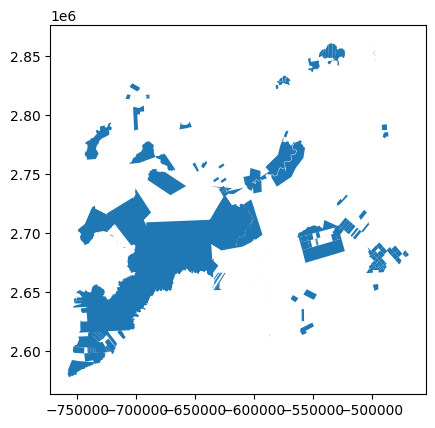

In [ ]:
valid_im.plot()

In [ ]:
imoveis_diss = valid_im.dissolve('NOM_MUNICI')
imoveis_diss

,geometry,COD_IMOVEL,NUM_AREA,COD_ESTADO,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,fid,id_uc,nome_uc,wdpa_pid,categoria,grupo,esfera,ano_criaca,qualidade,ato_criaca,codigo_uc,nome_og,hectares,nome_abrev,area_calc_uc_ha,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,area_intersec_ha,perc_intersec_imovel,perc_intersec_uc
NOM_MUNICI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LÃ¡brea,"MULTIPOLYGON (((-752347.200 2579915.851, -7518...",AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,6273.37,99.68,1.04


<Axes: >

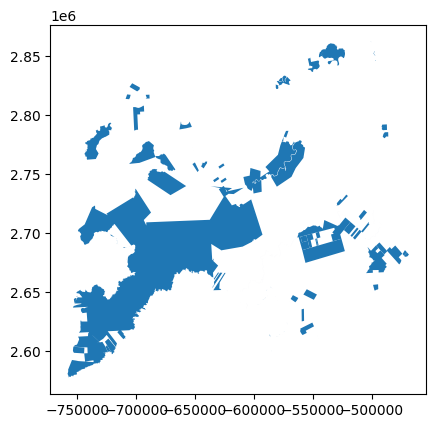

In [ ]:
imoveis_diss.plot()

In [ ]:
uc_im = cnuc.overlay(imoveis_diss, how='intersection')

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2451: UserWarning: `keep_geom_type=True` in overlay resulted in 178 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
cnuc.columns

Index(['fid', 'id_uc', 'nome_uc', 'wdpa_pid', 'categoria', 'grupo', 'esfera',
       'ano_criaca', 'qualidade', 'ato_criaca', 'codigo_uc', 'nome_og',
       'hectares', 'nome_abrev', 'geometry', 'area_calc_uc_ha'],
      dtype='object')

In [ ]:
imoveis_diss.columns

Index(['geometry', 'COD_IMOVEL', 'NUM_AREA', 'COD_ESTADO', 'NUM_MODULO',
       'TIPO_IMOVE', 'SITUACAO', 'CONDICAO_I', 'area_calc_IM_ha', 'fid',
       'id_uc', 'nome_uc', 'wdpa_pid', 'categoria', 'grupo', 'esfera',
       'ano_criaca', 'qualidade', 'ato_criaca', 'codigo_uc', 'nome_og',
       'hectares', 'nome_abrev', 'area_calc_uc_ha', 'CD_MUN', 'NM_MUN',
       'SIGLA_UF', 'AREA_KM2', 'area_intersec_ha', 'perc_intersec_imovel',
       'perc_intersec_uc'],
      dtype='object')

<Axes: >

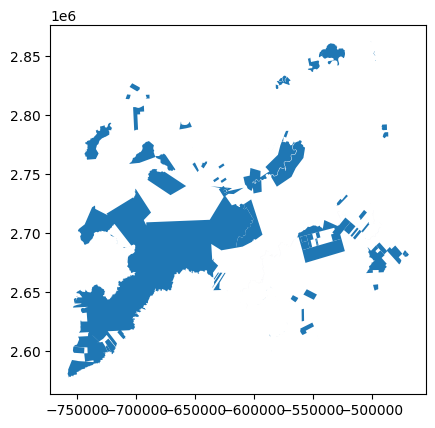

In [ ]:
uc_im.plot()

In [ ]:
uc_im['area_inter_ha'] = uc_im['geometry'].area*0.0001

In [ ]:
uc_im['perc_intersec_uc']=uc_im['area_inter_ha']/uc_im['area_calc_uc_ha_1']*100
uc_im

,fid_1,id_uc_1,nome_uc_1,wdpa_pid_1,categoria_1,grupo_1,esfera_1,ano_criaca_1,qualidade_1,ato_criaca_1,codigo_uc_1,nome_og_1,hectares_1,nome_abrev_1,area_calc_uc_ha_1,COD_IMOVEL,NUM_AREA,COD_ESTADO,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,area_calc_IM_ha,fid_2,id_uc_2,nome_uc_2,wdpa_pid_2,categoria_2,grupo_2,esfera_2,ano_criaca_2,qualidade_2,ato_criaca_2,codigo_uc_2,nome_og_2,hectares_2,nome_abrev_2,area_calc_uc_ha_2,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,area_intersec_ha,perc_intersec_imovel,perc_intersec_uc,geometry,area_inter_ha
0,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,6273.37,99.68,16.23,"MULTIPOLYGON (((-685453.248 2772350.720, -6854...",98065.59
1,351.00,1628,RESERVA EXTRATIVISTA ITUXí,478421,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1628,Instituto Chico Mendes de Conservação da Biodi...,776323.49,RESEX ITUXÍ,776329.64,AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,6273.37,99.68,17.89,"MULTIPOLYGON (((-622555.148 2650908.323, -6225...",138859.78
2,450.00,85,FLORESTA NACIONAL DE BALATA-TUFARI,351820,Floresta,US,federal,2005,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 18/02/2005,0000.00.0085,Instituto Chico Mendes de Conservação da Biodi...,1080020.94,FN DE BALATA-TUFARI,1079681.07,AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,6273.37,99.68,0.01,"MULTIPOLYGON (((-497326.447 2846272.842, -4973...",124.41
3,1197.00,1633,PARQUE NACIONAL MAPINGUARI,478431,Parque,PI,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2008,0000.00.1633,Instituto Chico Mendes de Conservação da Biodi...,1776925.54,PN MAPINGUARI,1776933.51,AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,0000.00.1606,Instituto Chico Mendes de Conservação da Biodi...,604225.60,RESEX DO MÉDIO PURÚS,604235.97,1302405,Lábrea,AM,68262.68,6273.37,99.68,8.35,"MULTIPOLYGON (((-471196.917 2680148.120, -4720...",148434.54
4,1445.00,768,ESTAÇÃO ECOLÓGICA SERRA DOS TRÊS IRMÃOS,33609,Estação Ecológica,PI,estadual,1990,Aproximado (O poligono representa uma estimati...,Decreto nº 4584 de 28/03/1990,0000.11.0768,Secretaria de Estado do Desenvolvimento Ambien...,88959.12,EE SERRA DOS TRÊS IRMÃOS,88961.77,AM-1302405-1B54FF81DC38485991020145AED6C7DE,6296.04,AM,62.96,IRU,AT,Em anÃ¡lise,6293.26,35.00,1606,RESERVA EXTRATIVISTA DO MéDIO PURúS,478420,Reserva Extrativista,US,federal,2008,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/05/2008,000

In [ ]:
uc_im.to_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/TABELAS_APs/imoveis-nas-ucs.csv')